In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

In [334]:
data = pd.read_csv('Data/Customers.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [336]:
chi = []
p2 = []
columns = [i for i in data.columns if not type(column) is object]
for column in columns:
    conttable = pd.crosstab(data['Churn'],data[column],margins = True)
    chi2, p, dof, exp = chi2_contingency(conttable.values)
    #print ("Feature-- {}--Chi2 = {:.2f}, p = {:.3f}" .format(column,chi2,p))
    p2.append(round(p,8))
    chi.append(round(chi2,2))
    
df = pd.DataFrame({'p':p2,'chi':chi}, index = data.columns)  

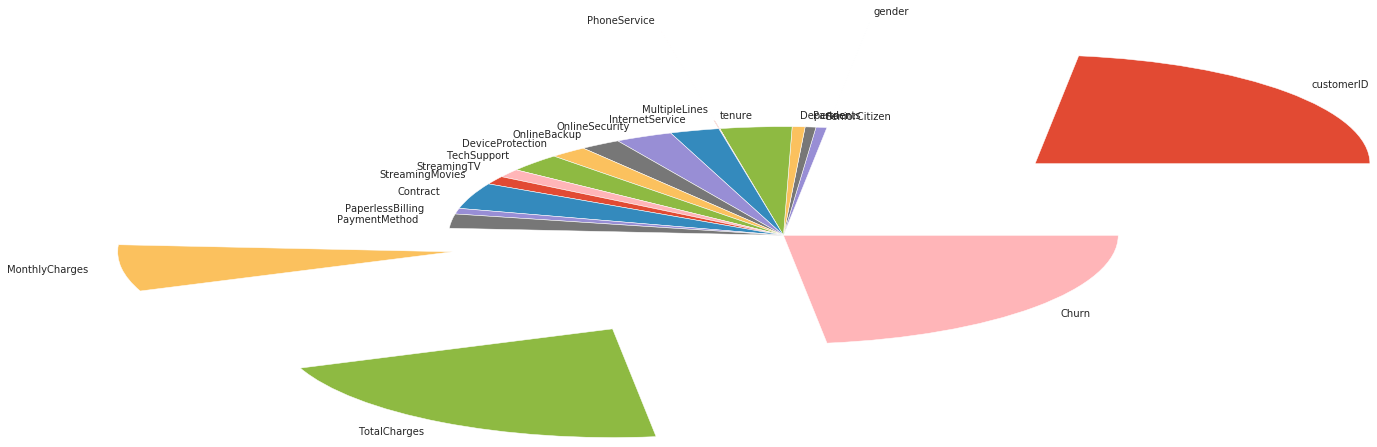

In [340]:
plt.figure(figsize = (15,5))
df2 = df[df['chi']!=0]
plt.pie(df2['chi'],labels = columns,explode = df['p'])
plt.show()

In [ ]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, figsize = (14,7))
g1 = sns.countplot(data = data,x='Churn', ax = ax1)
plt.title = 'sadasd'
g2 = sns.countplot(data = data,x='Contract', hue = 'Churn', ax = ax2)
g3 = sns.countplot(data = data,x='OnlineBackup', hue = 'Churn', ax = ax3)
g4 = sns.countplot(data = data,x='TechSupport', hue = 'Churn', ax = ax4)

In [ ]:
encoder = LabelEncoder()

for i in data.select_dtypes(include = 'object'):
    data[i] = encoder.fit_transform(data[i])

In [ ]:
y = data['Churn']

In [ ]:
X = data.drop(columns = ['customerID', 'Churn'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 101)

In [ ]:
Steps = [('scale', StandardScaler()),
        ('poly', PolynomialFeatures(1)),
          ('model',RandomForestRegressor(max_depth= 3, max_features= 7))]

In [ ]:
pipe = Pipeline(Steps)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
print ('Training set score : {}' .format(pipe.score(X_train, y_train)))
print ('Test set score : {}' .format(pipe.score(X_test, y_test)))

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
data = pd.crosstab(data['Churn'],data['Contract'])
table = sm.stats.Table.from_data(data)

In [ ]:
data

In [ ]:
print(table)